Medellin Reales 

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df_B_M = pd.read_csv('datos_sinnorm_sinimput.csv') 

#Medellin

df_M = df_B_M.loc[df_B_M['medellin'] == 1]
df_M = df_M.dropna(subset = ['lat', 'lon'])
df_m = df_M[['ID', 'lon', 'lat']]

#Eliminacion de Datos Outliers

df_m = df_m.loc[df_m['lat'] >= 6.1]
df_m = df_m.loc[df_m['lat'] <= 6.4]
df_m = df_m.loc[df_m['lon'] >= -75.71034908]
df_m = df_m.loc[df_m['lon'] <= -75.4]

#Creacion del GeoDataFrame con los datos restantes

gdf_geom = gpd.GeoDataFrame(df_m, geometry = gpd.points_from_xy(df_m.lon, df_m.lat), crs={'init': 'epsg:4326'})
#gdf_geom.to_file('C:/Users/danie/Documents/Daniel/SIMAT/Ubicaciones_Medellin/Ubicaciones_Medellin_Datos_Reales.shp')

#Cargar el mapa de Medellin

sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')
#puntos_de_venta_medellin_reales = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Ubicaciones_Medellin/Ubicaciones_Medellin_Datos_Reales.shp')

#Graficar los puntos en el mapa

#sectores.plot(cmap = 'jet', column = 'NOMBRE', figsize = (10,10))
#puntos_de_venta_medellin_reales.plot()
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

#Crear un nuevo GeodataFrame que unicamente contiene los datos que se encuentran dentro del mapa

sectores_con_puntos_de_venta = gpd.sjoin(gdf_geom, sectores, how = "left", op = 'intersects')

#Filtrar el GeoDataFrame, eliminando los datos que no se encuentran en el mapa

sectores_con_puntos_de_venta_Medellin = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta.isna()['SECTOR'].apply(lambda value: not value)]

#Graficar el todos los puntos que se encuentran dentro del mapa

ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

#Agregar una columna al DataSet inicial que indique cuales son los puntos que realmente se encuentran dentro del mapa

Medellin_Reales = np.zeros(df_B_M.shape[0])
for i in sectores_con_puntos_de_venta_Medellin['ID']:
    Medellin_Reales[i] = 1
df_B_M['Medellin Reales'] = Medellin_Reales

#Crear nuevo dataset
#df_B_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_con_Medellin_reales.csv')

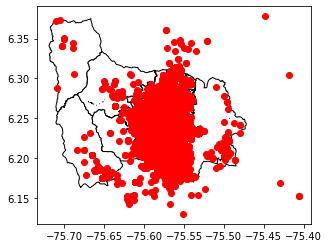

In [2]:
#sectores.plot(cmap = 'jet', column = 'NOMBRE', figsize = (10,10))
#puntos_de_venta_medellin_reales.plot()
ax = sectores.plot(color='white', edgecolor='black')
gdf_geom.plot(ax = ax, color = 'red')

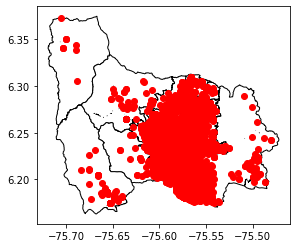

In [3]:
ax = sectores.plot(color='white', edgecolor='black')
sectores_con_puntos_de_venta_Medellin.plot(ax = ax, color = 'red')

Datos solamente Medellin

In [4]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df_B_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_con_Medellin_reales.csv')

#filtrar datos que no son de Medellin y unirlos a los que necesitan input de coordenadas
df_M = df_B_M[df_B_M['medellin'] == 1]
df_M_imput = df_M[df_M['lat'].isna()]
df_M_reales = df_M[df_M['Medellin Reales'] == 1]
df_M = df_M_imput.append(df_M_reales)

#Crear nuevo dataset
#df_M.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_medellin_only.csv')

Imputacion de Datos INCOMPLETO

In [ ]:
import random as rd
from random import uniform, randint

#Imputacion de coordenadas
df_M_imput['lon'] = df_M_imput['lon'].apply(lambda x: uniform(-75.75,-75.45))
df_M_imput['lat'] = df_M_imput['lat'].apply(lambda x: uniform(6.40,6.15))

#Imputacion de bedroom y bathroom
df_M_imput['bedroom'] = df_M_imput['bedroom'].apply(lambda x: randint())

In [ ]:
#Imputacion de bedroom y bathroom
import sklearn.impute
from sklearn.impute import SimpleImputer

imputed_lon = SimpleImputer(strategy = 'mean')
df_M['lon'] = imputed_lon.fit_transform(df_M['bedrooms'].values[:,None])
#df_M_nuevo_completo['lon'] = imputed_lon.transform(df_M_nuevo_completo['lon'].values[:,None])
print(df_M['lon'])

imputed_lat = SimpleImputer(strategy = 'mean')
imputed_lat.fit(df_M_nuevo_completo['lat'].values[:,None])
df_M_nuevo_completo['lat'] = imputed_lat.transform(df_M_nuevo_completo['lat'].values[:,None])

#df_M_nuevo_completo.to_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_con_cord_imput_medellin.csv')

Filtrar tipos de vivienda

In [6]:
import pandas as pd 
import numpy as np

df_M = pd.read_csv('C:/Users/danie/Documents/Daniel/SIMAT/datos_sinnorm_sinimput_medellin_only.csv')

#crear nuevo dataframe con estrutcura deseada
df_M_nuevo_completo = pd.DataFrame ({
    'created_on' : df_M['created_on'],
    'end_date' : df_M['end_date'],
    'delta_time' : df_M['delta_time'],
    'lon' : df_M['lon'],
    'lat' : df_M['lat'],
    'surface' : df_M['surface_total'],
    'bedrooms' : df_M['bedrooms'],
    'bathrooms' : df_M['bathrooms'],
    'casa' : np.zeros(df_M.shape[0]),
    'apartamento' : np.zeros(df_M.shape[0]),
    'finca' : np.zeros(df_M.shape[0]),
    'lote' : np.zeros(df_M.shape[0]),
    'oficina' : np.zeros(df_M.shape[0]),
    'local_comercial' : np.zeros(df_M.shape[0]),
    'parqueadero' : np.zeros(df_M.shape[0]),
    'deposito' : np.zeros(df_M.shape[0]),
    'price' : df_M['price']
})

#extraer valores unicos en columna de propiedad
unicos = df_M['property_type'].unique()

#Categorizacion
df_M_nuevo_completo['casa'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[0]) else 0)
df_M_nuevo_completo['apartamento'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[2]) else 0)
df_M_nuevo_completo['finca'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[6]) else 0)
df_M_nuevo_completo['lote'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[5]) else 0)
df_M_nuevo_completo['oficina'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[4]) else 0)
df_M_nuevo_completo['local_comercial'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[8]) else 0)
df_M_nuevo_completo['parqueadero'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[3]) else 0)
df_M_nuevo_completo['deposito'] = df_M['property_type'].apply(lambda propiedad: 1 if (propiedad == unicos[7]) else 0)

Filtro de datos por comuna o corregimiento

In [ ]:
import geopandas as gpd

#Filtro de datos faltantes provisional
df_M_DR = df_M_nuevo_completo.loc[df_M_nuevo_completo['lat'].isna().apply(lambda value: not value)]

#Creacion del GeoDataFrame
gdf_M_DR = gpd.GeoDataFrame(df_M_DR, geometry = gpd.points_from_xy(df_M_DR.lon, df_M_DR.lat), crs={'init': 'epsg:4326'})

sectores = gpd.read_file('C:/Users/danie/Documents/Daniel/SIMAT/Límite_Catastral_de__Comunas_y_Corregimientos/Límite_Catastral_de__Comunas_y_Corregimientos.shp')

#SpatialJoin
sectores_con_puntos_de_venta = gpd.sjoin(gdf_M_DR, sectores, how = "left", op = 'intersects')

Crear columnas adicionales en dataframe

In [ ]:
comunas = sectores_con_puntos_de_venta['NOMBRE'].unique()

df_M_nuevo_completo['laureles'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[0]) else 0)
df_M_nuevo_completo['la_candelaria'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[1]) else 0)
df_M_nuevo_completo['el_poblado'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[2]) else 0)
df_M_nuevo_completo['villa_hermosa'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[3]) else 0)
df_M_nuevo_completo['guayabal'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[4]) else 0)
df_M_nuevo_completo['robledo'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[5]) else 0)
df_M_nuevo_completo['altavista'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[6]) else 0)
df_M_nuevo_completo['la_america'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[7]) else 0)
df_M_nuevo_completo['buenos_aires'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[8]) else 0)
df_M_nuevo_completo['belen'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[9]) else 0)
df_M_nuevo_completo['aranjuez'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[10]) else 0)
df_M_nuevo_completo['castilla'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[11]) else 0)
df_M_nuevo_completo['santa_elena'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[12]) else 0)
df_M_nuevo_completo['manrique'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[13]) else 0)
df_M_nuevo_completo['san_javier'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[14]) else 0)
df_M_nuevo_completo['popular'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[15]) else 0)
df_M_nuevo_completo['prado'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[16]) else 0)
df_M_nuevo_completo['12_octubre'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[17]) else 0)
df_M_nuevo_completo['palmitas'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[18]) else 0)
df_M_nuevo_completo['santa_cruz'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[19]) else 0)
df_M_nuevo_completo['san_cristobal'] = sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: 1 if (x == comunas[20]) else 0)

Crear dataframes para cada Comuna/Corregimiento

In [ ]:
comunas = sectores_con_puntos_de_venta['NOMBRE'].unique()

laureles = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[0])]
candelaria = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[1])]
poblado = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[2])]
villa_hermosa = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[3])]
guayabal = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[4])]
robledo = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[5])]
altavista = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[6])]
la_america = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[7])]
buenos_aires = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[8])]
belen = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[9])]
aranjuez = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[10])]
castilla = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[11])]
santa_elena = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[12])]
manrique = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[13])]
san_javier = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[14])]
pupular =  sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[15])]
prado = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[16])]
doce_de_octubre = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[17])]
palmitas = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[18])]
santa_cruz = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[19])]
san_cristobal = sectores_con_puntos_de_venta.loc[sectores_con_puntos_de_venta['NOMBRE'].apply(lambda x: x == comunas[20])]

In [9]:
#Numero de datos de cada categoria
print('Datos')
print(df_M_nuevo_completo['casa'].sum())
print(df_M_nuevo_completo['apartamento'].sum())
print(df_M_nuevo_completo['finca'].sum())
print(df_M_nuevo_completo['lote'].sum())
print(df_M_nuevo_completo['oficina'].sum())
print(df_M_nuevo_completo['local_comercial'].sum())
print(df_M_nuevo_completo['parqueadero'].sum())
print(df_M_nuevo_completo['deposito'].sum())

datos_imput = df_M_nuevo_completo.iloc[0:6105]
datos_reales = df_M_nuevo_completo.iloc[6105:24880]

print('Datos a completar coordenadas')
print(datos_imput['casa'].sum())
print(datos_imput['apartamento'].sum())
print(datos_imput['finca'].sum())
print(datos_imput['lote'].sum())
print(datos_imput['oficina'].sum())
print(datos_imput['local_comercial'].sum())
print(datos_imput['parqueadero'].sum())
print(datos_imput['deposito'].sum())

print('Datos reales coordenadas')
print(datos_reales['casa'].sum())
print(datos_reales['apartamento'].sum())
print(datos_reales['finca'].sum())
print(datos_reales['lote'].sum())
print(datos_reales['oficina'].sum())
print(datos_reales['local_comercial'].sum())
print(datos_reales['parqueadero'].sum())
print(datos_reales['deposito'].sum())

Datos
6602
10791
216
269
189
225
48
19
Datos a completar coordenadas
1734
2533
27
21
16
15
2
3
Datos reales coordenadas
4868
8258
189
248
173
210
46
16


In [ ]:
#Creacion de nuevos dataframes con valores deseados
df_M_nuevo_viviendas = df_M_nuevo_completo.drop(['finca', 'lote', 'oficina', 'local_comercial', 'parqueadero', 'deposito'], axis = 1)
df_M_nuevo_viviendas_finca = df_M_nuevo_completo.drop(['lote', 'oficina', 'local_comercial', 'parqueadero', 'deposito'], axis = 1)
df_M_nuevo_demas = df_M_nuevo_completo.drop(['casa', 'apartamento'], axis = 1)